# 1. Collaborative Filtering

## Impoting Libraries

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as map
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
import nltk
import operator
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 


#To ignore warnings.
import warnings
warnings.filterwarnings('ignore')

#saving model
import joblib


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>


## Loading the Dataset

In [2]:
df_all_offers = pd.read_csv('ALL_Offers.csv')

In [3]:
df_offers = pd.read_csv('offers.csv')

In [4]:
df_org = pd.read_csv('organizations.csv')

## Exploratory Data Analysis

 Data Analysis of All_offers.csv

---



In [5]:
df_all_offers.head()

,posted_by_id,status,city,job_title,organization_id,contracts,description,skills
0,1,published,Bondues,Stagiaire (H/F) Assistant Marketing Nutritionnel,1,Stage6mois,Entreprise Le Groupe LACTALIS (près de ...,{'skills': {'communication': 1}}
1,2,published,Rhône,Expert process traitement thermique h/f,2,CDI,Entreprise Filiale européenne du groupe...,"{'skills': {'communication': 1, 'consulting': ..."
2,3,published,Paris,Charge d'operation grands comptes h/f,3,CDI,"Entreprise Notre client, première socié...","{'skills': {'collaboration': 1, 'reporting': 1..."
3,4,published,Rueil-Malmaison,Ingénieur Génie Civil stage F/H,4,Stage6mois,Entreprise Acteur mondial et leader eur...,"{'skills': {'collaboration': 1, 'ensemble': 1,..."
4,5,published,Levallois-Perret,Chargé pricing H/F,5,CDI,"Entreprise ALLIANCE AUTOMOTIVE France, ...","{'skills': {'collaboration': 1, 'leadership': 1}}"


In [6]:
#Number of Rows in the dataset
print("Number of Rows are:",df_all_offers.shape[0])

Number of Rows are: 8867


In [7]:
#Number of Columns/features in dataset
print("Number of Columns are:",df_all_offers.shape[1])

Number of Columns are: 8


In [8]:
#List of Available features in dataset
print("Available Features are:",df_all_offers.columns.tolist())

Available Features are: ['posted_by_id', 'status', 'city', 'job_title', 'organization_id', 'contracts', 'description', 'skills']


In [9]:
# Let's checkout which feature contains which kind of values i.e int /float /etc or what is the data type of values.
print(df_all_offers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   posted_by_id     8867 non-null   int64 
 1   status           8867 non-null   object
 2   city             8867 non-null   object
 3   job_title        8867 non-null   object
 4   organization_id  8867 non-null   int64 
 5   contracts        8867 non-null   object
 6   description      8867 non-null   object
 7   skills           8867 non-null   object
dtypes: int64(2), object(6)
memory usage: 554.3+ KB
None


In [10]:
#Checking is their any missing values are available in the dataset

print("Missing values:\n ",df_all_offers.isnull().sum())


Missing values:
  posted_by_id       0
status             0
city               0
job_title          0
organization_id    0
contracts          0
description        0
skills             0
dtype: int64


In [11]:
# check for duplicate values
df_all_offers.duplicated().sum()


141

In [12]:
#checing number of unique values available in each column
df_all_offers.nunique()

posted_by_id       1345
status                1
city               1020
job_title          6770
organization_id    1345
contracts            52
description        8707
skills             2950
dtype: int64

Data Analysis of offers.csv

---



In [14]:
df_offers.head()

,user_id,status,city,job_title,organization_id,contracts,description,skills
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 1, 'certifications': 1..."
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'hardware': 2, 'communication': 1,..."
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'communication': 4, 'e-commerce': 1}}"
3,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'mobile': 1, 'communication': 2, '..."
4,4,published,HOLLISTER,Foreign Service Officer,4,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 4, 'designer': 1, 'pro..."


In [15]:
#Number of Rows in the dataset
print("Number of Rows are:",df_offers.shape[0])

Number of Rows are: 252


In [16]:
#Number of Columns/features in dataset
print("Number of Columns are:",df_offers.shape[1])

Number of Columns are: 8


In [17]:
#List of Available features in dataset
print("Available Features are:",df_offers.columns.tolist())

Available Features are: ['user_id', 'status', 'city', 'job_title', 'organization_id', 'contracts', 'description', 'skills']


In [18]:
# Let's checkout which feature contains which kind of values i.e int /float /etc or what is the data type of values.
print(df_offers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          252 non-null    int64 
 1   status           252 non-null    object
 2   city             252 non-null    object
 3   job_title        252 non-null    object
 4   organization_id  252 non-null    int64 
 5   contracts        252 non-null    object
 6   description      252 non-null    object
 7   skills           252 non-null    object
dtypes: int64(2), object(6)
memory usage: 15.9+ KB
None


In [19]:
#Checking is their any missing values are available in the dataset

print("Missing values:\n ",df_offers.isnull().sum())

Missing values:
  user_id            0
status             0
city               0
job_title          0
organization_id    0
contracts          0
description        0
skills             0
dtype: int64


In [20]:
# check for duplicate values
df_offers.duplicated().sum()

0

In [21]:
#checing number of unique values available in each column
df_offers.nunique()

user_id            200
status               1
city               213
job_title          222
organization_id    200
contracts            1
description          1
skills             151
dtype: int64

Data Analysis of Users.csv

---



In [22]:
df_org.head()

,organization_id,company_name,email,address,size,sectors
0,0,BARON & DECK,John.C.Maher@spambob.com,1018 1ST AVE APT 1229 # 7A,MC,PT
1,1,HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
2,2,GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD
3,3,F A A AIRPORT,John.P.Stephens@pookmail.com,10826 WALNUT ST,MD,MA
4,4,BON JOUR ANSWERING,Nicholas.J.Fisher@spambob.com,101 JACKS LN,ST,GD


In [23]:
#Number of Rows in the dataset
print("Number of Rows are:",df_org.shape[0])

Number of Rows are: 201


In [24]:
#Number of Columns/features in dataset
print("Number of Columns are:",df_org.shape[1])

Number of Columns are: 6


In [25]:
#List of Available features in dataset
print("Available Features are:",df_org.columns.tolist())

Available Features are: ['organization_id', 'company_name', 'email', 'address', 'size', 'sectors']


In [25]:
# Let's checkout which feature contains which kind of values i.e int /float /etc or what is the data type of values.
print(df_offers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          252 non-null    int64 
 1   status           252 non-null    object
 2   city             252 non-null    object
 3   job_title        252 non-null    object
 4   organization_id  252 non-null    int64 
 5   contracts        252 non-null    object
 6   description      252 non-null    object
 7   skills           252 non-null    object
dtypes: int64(2), object(6)
memory usage: 15.9+ KB
None


In [26]:
#Checking is their any missing values are available in the dataset

print("Missing values:\n ",df_org.isnull().sum())

Missing values:
  organization_id    0
company_name       0
email              0
address            0
size               0
sectors            0
dtype: int64


In [27]:
# check for duplicate values
df_org.duplicated().sum()

0

In [28]:
#checing number of unique values available in each column
df_org.nunique()

organization_id    201
company_name       106
email              201
address            201
size                 4
sectors              5
dtype: int64

Combining the Datasets

---


In [29]:
#Combining the dataset Offers.csv and Org.csv
df_combined1=pd.merge(df_offers,df_org)
df_combined1.head()

,user_id,status,city,job_title,organization_id,contracts,description,skills,company_name,email,address,size,sectors
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 1, 'certifications': 1...",BARON & DECK,John.C.Maher@spambob.com,1018 1ST AVE APT 1229 # 7A,MC,PT
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'hardware': 2, 'communication': 1,...",HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'communication': 4, 'e-commerce': 1}}",GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD
3,22,published,CHICAGO RIDGE,Endoscopy Nurse,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,{'skills': {'e-commerce': 1}},GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD
4,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'mobile': 1, 'communication': 2, '...",F A A AIRPORT,John.P.Stephens@pookmail.com,10826 WALNUT ST,MD,MA


In [30]:
#Number of Rows in the dataset
print("Number of Rows are:",df_combined1.shape[0])
#Number of Columns/features in dataset
print("Number of Columns are:",df_combined1.shape[1])

Number of Rows are: 252
Number of Columns are: 13


In [31]:
#Combining the Datasets All_offers.csv and Org.csv
df_combined2=pd.merge(df_all_offers,df_org,on='organization_id')
df_combined2.head()

,posted_by_id,status,city,job_title,organization_id,contracts,description,skills,company_name,email,address,size,sectors
0,1,published,Bondues,Stagiaire (H/F) Assistant Marketing Nutritionnel,1,Stage6mois,Entreprise Le Groupe LACTALIS (près de ...,{'skills': {'communication': 1}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
1,1,published,Laval,Stagiaire (H/F) Ingénieur Maintenance Toute Fr...,1,Stage6mois,Entreprise Vous souhaitez faire vos pre...,{'skills': {}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
2,1,published,Châteaubourg,Stage (H/F) Ingé Production (35),1,Stage6mois,Entreprise Vous souhaitez faire vos pre...,{'skills': {'autonome': 1}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
3,1,published,Châteaubourg,Stage (H/F) Ingé Prod - fabrication (35),1,Stage6mois,Entreprise Vous souhaitez faire vos pre...,{'skills': {'autonome': 1}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
4,1,published,Noisy-le-Grand,Stagiaire H/F- Chargé(e) de missions RH,1,Stage6mois,Entreprise La Division Lactalis Nestlé ...,{'skills': {}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA


In [32]:
#Number of Rows in the dataset
print("Number of Rows are:",df_combined2.shape[0])
#Number of Columns/features in dataset
print("Number of Columns are:",df_combined2.shape[1])

Number of Rows are: 5087
Number of Columns are: 13


Job and Skills List of Dictionary


In [34]:
#Combining the Datasets All_offers.csv and Org.csv
df_combined1['contracts'].unique()

array(['AL'], dtype=object)

In [35]:
jobs = df_combined1['job_title'].unique()
# jobs

In [35]:
len(jobs)

222

In [36]:
newdf = df_combined1[['user_id', 'job_title','skills']]
newdf

,user_id,job_title,skills
0,55,Medical Receptionist,"{'skills': {'training': 1, 'certifications': 1..."
1,90,Clinical Research Associate,"{'skills': {'hardware': 2, 'communication': 1,..."
2,2,Territory Sales Representative,"{'skills': {'communication': 4, 'e-commerce': 1}}"
3,22,Endoscopy Nurse,{'skills': {'e-commerce': 1}}
4,3,Bus Driver,"{'skills': {'mobile': 1, 'communication': 2, '..."
...,...,...,...
247,196,Controls Engineer,"{'skills': {'ai': 2, 'hardware': 1, 'internet'..."
248,197,Implementation Consultant,"{'skills': {'reporting': 2, 'ai': 5, 'communic..."
249,198,Competitive Intelligence Manager,"{'skills': {'certifications': 1, 'ai': 6, 'boo..."
250,199,Health/Physical Education Teacher,"{'skills': {'mobile': 1, 'design': 1}}"


In [37]:
newdf['skills']

0      {'skills': {'training': 1, 'certifications': 1...
1      {'skills': {'hardware': 2, 'communication': 1,...
2      {'skills': {'communication': 4, 'e-commerce': 1}}
3                          {'skills': {'e-commerce': 1}}
4      {'skills': {'mobile': 1, 'communication': 2, '...
                             ...                        
247    {'skills': {'ai': 2, 'hardware': 1, 'internet'...
248    {'skills': {'reporting': 2, 'ai': 5, 'communic...
249    {'skills': {'certifications': 1, 'ai': 6, 'boo...
250               {'skills': {'mobile': 1, 'design': 1}}
251    {'skills': {'reporting': 2, 'ai': 5, 'communic...
Name: skills, Length: 252, dtype: object

In [125]:
def delete_spec_chars(input): 
    #function to delete special characters

    regex = r'[^a-zA-Z0-9\s]'
    output = re.sub(regex,'',input)
    return output

#creating list of dictionary to store the job and it's corresponding skills
skills = []
new_skills=[]
for j in jobs:
    #traversing through job and comparing it with job title in dataframe if both are same then adding their skills.

    #creating inner list to store the skills of one job
    d=[]
    inner_list=[]
    for i, row in newdf.iterrows():
        if(row['job_title']==j):
            d.append(row['skills'])
  
    #removing all the special characters from that
    doc = delete_spec_chars(str(d))

    #removing digits from that
    doc = re.sub(r'\d+','',doc)

    #removing skills word from that
    doc=re.sub(r'skills','',doc)

    #Applying word tokenization to extract tokens
    tokens = word_tokenize(doc) 
    # print("document is: ")
    # print(doc)
    # print(" tokens are: ")

    tokens= [word.lower() for word in tokens]
    # print(tokens)
    
    #To remove duplicate skills 
    tokens=list(set(tokens))

    #Adding that in skills dicitonary for one job
    skills.append(tokens)

    inner_list.append(doc)
    new_skills.append(inner_list)

#   skillss.append(newdf.loc[newdf['job_title'] == j]['skills'])


In [40]:
#retreiving all the skills from skills set and storing them in total_skills list.
total_skills=[]
for val in skills:
    for keys in val:
        if keys not in total_skills:
            total_skills.append(keys)
        else:
            continue

total_skills=list(set(total_skills))
# print(total_skills)

print("Total number of available skills are: ", len(total_skills))

Total number of available skills are:  155


In [41]:
#To create dataframe, creating columns of that

column_headers=['Jobs']

for val in total_skills:
    column_headers.append(val)

# print(column_headers)
print("total number of columns are: ", len(column_headers))

total number of columns are:  156


In [42]:
#creating list to insert it in dataframe.
data_list = []

for index, obj in enumerate(skills):
    inner_list=[]
    # print(obj)

    # print(index)
    # inner_list.append(jobs[index])

    for val in column_headers:
        if val=='Jobs':
            inner_list.append(jobs[index])
        else:
            if val in obj:
                inner_list.append(1)
            else:
                inner_list.append(0)

    data_list.append(inner_list)

# print(data_list)

#Finding length to check if skills set is added for each job or not
print("len is", len(data_list))
  

len is 222


In [43]:
print(data_list[0])

['Medical Receptionist', 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [44]:
#converting into dataframe:

meta_data = pd.DataFrame(data_list,columns=column_headers)
meta_data.head(5)

,Jobs,spark,aspnet,statistical,swing,content,hadoop,ecommerce,mining,software,...,penetration,scrum,windows,social,detail,lte,coding,fortran,engineering,prestashop
0,Medical Receptionist,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Clinical Research Associate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Territory Sales Representative,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Endoscopy Nurse,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bus Driver,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
meta_data.columns

Index(['Jobs', 'spark', 'aspnet', 'statistical', 'swing', 'content', 'hadoop',
       'ecommerce', 'mining', 'software',
       ...
       'penetration', 'scrum', 'windows', 'social', 'detail', 'lte', 'coding',
       'fortran', 'engineering', 'prestashop'],
      dtype='object', length=156)

In [46]:
meta_data_matrix= np.array(meta_data)


## **Tanimoto/Jaccard Similarity**

Calculating Union

In [47]:
def union(job1,job2):
    #Calculating Union
    result = list(set(job1) | set(job2))
    return result


Calculating Intersection

In [48]:
def intersection(job1,job2):
    #Calculating intersection
    result = list(set(job1) & set(job2))
    return result

Calculating similarity between jobs

In [50]:
def calculate_tanimoto_similarity():
    #Function to Calculate tanimoto similarity
    
    #Dictionary to store tanimoto similarity for each job with other in key:value format.
    dict_tanimoto_val={}
    for index, obj in enumerate(skills):
        # print(obj)
        inner_list=[]
        for next_index,next_obj in enumerate(skills):
            if(index==next_index):
                #because if job is same then 100% similarity
                inner_list.append(1.0)
                # continue
            
            else:
                # print(obj)
                union_result=union(obj, next_obj)
                # print("length of union result",len(union_result))
                intersection_result=intersection(obj, next_obj)
                # print("length of intersection result",len(intersection_result))

                inner_list.append(len(intersection_result)/len(union_result))

        dict_tanimoto_val[jobs[index]] = inner_list

     
    return dict_tanimoto_val
tanimoto_sim_dict=calculate_tanimoto_similarity()
# print(tanimoto_sim_dict)


 **Recommending Top5 Jobs**

Calculating similarity between skills query set and jobs skills set

In [51]:
def calulate_query_similarity(skills_query):

    tanimoto_dict={}

    for index,obj in enumerate(skills):
        union_result=union(skills_query, obj)
        # print("length of union result",len(union_result))
        intersection_result=intersection(skills_query, obj)
        # print("length of intersection result",len(intersection_result))

        tanimoto_dict[jobs[index]]=(len(intersection_result)/len(union_result))

    return tanimoto_dict


Finding similarity for query skills set and Top matched job

In [52]:
def recommend():
    #Function for Query preprocessing and calculation of jaccard coeff.

    skills_input=input("Please Enter Your Skills:  ")
    #enter queries with proper space in betwen

    #Deleting special charachter if any from input
    skills_preprocessed=delete_spec_chars(skills_input)

    #Tokenizing those skills
    tokens = word_tokenize(skills_preprocessed)

    #Converting all the skills in lower case, because while making dataframe also we converted skills in lower case
    tokens= [word.lower() for word in tokens]

    #removing stop words and words of length 1 also it may be possibility that user may enter some garbage value that's why
    skills_query=[word for word in tokens if word not in stop_words and len(word) > 1] #Removing stopwords 
    
    print(skills_query)

    #Calculating tanimoto similarity of skills with all the available job skills
    tanimoto_val=calulate_query_similarity(skills_query)

    # print(tanimoto_val)

    #Calculate highest matched documents 
    #for that we have to sort them in descending order
    sorted_d = dict( sorted(tanimoto_val.items(), key=operator.itemgetter(1),reverse=True))
    # top5=calculate_top(jaccard_val)
    # print(top5)
    # return top5

    return tanimoto_val,sorted_d

tanimoto_similarity_val,sorted_d=recommend()

# print("before sorting")
# print(tanimoto_similarity_val)

# print("after sorting")
# print(sorted_d)

Please Enter Your Skills:   programming software design


['programming', 'software', 'design']


In [53]:
#Finding top matched job
top_match=list(sorted_d.keys())[0]
top_match

'Conservation Technician'

Retrieving top5 jobs with highest similarity matched to it

Calculate top5 job

In [54]:
def calculate_top(new_sorted_d):
    #Function to calculate top 5 documents according to the value of jaccard coeffecient.
    count=0
    top5=[]
    for item in new_sorted_d.keys():
        #Finding top5 documents

        if (count != 5):
            top5.append(item)
        else: 
            break
        count=count+1
    
    return top5


In [57]:
#adding all the similarity values with top match with job in dictionary
new_dict={}
for index,obj in enumerate(tanimoto_sim_dict[top_match]):
    new_dict[jobs[index]]=obj

#now getting the value with highest match, i.e. we have to sort in descending order

new_sorted_d=dict( sorted(new_dict.items(), key=operator.itemgetter(1),reverse=True))

#as we can see values obtained are same as query so correct ans

#To retreive top 5 document:
top5=calculate_top(new_sorted_d)

print("top 5 recommended jobs are:")
print(top5)

top 5 recommended jobs are:
['Conservation Technician', 'Concierge', 'Water Services Technician', 'Principal Service Engineer', 'Hunting Guide']


In [58]:
#Top 5 Recommended jobs are
print(top5)

['Conservation Technician', 'Concierge', 'Water Services Technician', 'Principal Service Engineer', 'Hunting Guide']


## **Job Recommendation Collaborative Filtering - Cosine Similarity**

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
cossim = pd.DataFrame(cosine_similarity(meta_data.drop('Jobs', axis=1)),index=meta_data['Jobs'], columns = meta_data['Jobs'])
cos_job_dict = cossim.to_dict()

In [61]:
import math
import re
from collections import Counter

In [62]:
WORD = re.compile(r"\w+")

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [63]:
def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [64]:
def cosine_recommend():
    #Function for Query preprocessing and calculation of jaccard coeff.

    skills_input=input("Please Enter Your Skills:  ")
    #enter queries with proper space in betwen

    #Deleting special charachter if any from input
    skills_preprocessed=delete_spec_chars(skills_input)

    #Tokenizing those skills
    tokens = word_tokenize(skills_preprocessed)

    #Converting all the skills in lower case, because while making dataframe also we converted skills in lower case
    tokens= [word.lower() for word in tokens]

    #removing stop words and words of length 1 also it may be possibility that user may enter some garbage value that's why
    skills_query=[word for word in tokens if word not in stop_words and len(word) > 1] #Removing stopwords 
    query_txt = delete_spec_chars(str(skills_query))
    print(skills_query)
    print(query_txt)

    qvector = text_to_vector(query_txt)

    cosine_dict = {}

    for ind,ski in enumerate(new_skills):
      ski_txt = delete_spec_chars(str(ski))
      ski_vector = text_to_vector(ski_txt)
      cosine = get_cosine(qvector, ski_vector)
      cosine_dict[jobs[ind]]=cosine

    sorted_cosine = dict( sorted(cosine_dict.items(), key=operator.itemgetter(1),reverse=True))
    return cosine_dict, sorted_cosine

cos_dict, sorted_dict = cosine_recommend()

Please Enter Your Skills:   programming ensemble software


['programming', 'ensemble', 'software']
programming ensemble software


In [67]:
cos_top_match=list(sorted_dict.keys())[0]

In [68]:
new_cos_dict = cos_dict[cos_top_match]
print(new_cos_dict)

0.5773502691896258


### **Performance Analysis of Cosine Similarity**

In [71]:
test_data=newdf.sample(frac=.2)
test_data=test_data.reset_index()
test_data

,index,user_id,job_title,skills
0,119,8,Operations Agent,"{'skills': {'communication': 1, 'reporting': 2}}"
1,67,42,Stationary Engineer,"{'skills': {'communication': 1, 'internet': 1,..."
2,124,88,Travel Secretary,{'skills': {'internet': 1}}
3,46,30,Assistant Coach,"{'skills': {'collaboration': 1, 'documentation..."
4,123,34,Heavy Equipment Technician,"{'skills': {'training': 2, 'data collection': ..."
5,129,91,Project Manager,{'skills': {'engineering': 1}}
6,179,131,Patient Care Coordinator,{'skills': {'ensemble': 5}}
7,117,83,Club Representative,"{'skills': {'mobile': 1, 'communication': 1, '..."
8,180,132,Senior Manager Product Intelligence and Cost A...,"{'skills': {'hardware': 3, 'mobile': 1, 'coach..."
9,233,182,Assistant Principal,{'skills': {'internet': 1}}


In [72]:
test_jobs = test_data['job_title'].unique()
# print(test_jobs)
print(len(test_jobs))

50


In [126]:
#creating list of dictionary to store the job and it's corresponding skills
test_skills = []
for j in test_jobs:
    #traversing through job and comparing it with job title in dataframe if both are same then adding their skills.

    #creating inner list to store the skills of one job
    d=[]
    for i, row in test_data.iterrows():
        if(row['job_title']==j):
            d.append(row['skills'])
  
    #removing all the special characters from that
    doc = delete_spec_chars(str(d))

    #removing digits from that
    doc = re.sub(r'\d+','',doc)

    #removing skills word from that
    doc=re.sub(r'skills','',doc)

    #Applying word tokenization to extract tokens
    tokens = word_tokenize(doc) 

    tokens= [word.lower() for word in tokens]

    #To remove duplicate skills 
    tokens=list(set(tokens))

    #Adding that in skills dicitonary for one job
    test_skills.append(tokens)

#   skillss.append(newdf.loc[newdf['job_title'] == j]['skills'])


In [75]:
print(test_skills[0])
print(len(test_skills))

['reporting', 'communication']
50


In [78]:
test_skills_strings = []
for s in range(len(test_skills)):
  qtext = delete_spec_chars(str(test_skills[s]))
  test_skills_strings.append(qtext)

In [79]:
def cosine_recommend1(skills_input):
    #Function for Query preprocessing and calculation of jaccard coeff.

    #skills_input=input("Please Enter Your Skills:  ")
    #enter queries with proper space in betwen

    #Deleting special charachter if any from input
    skills_preprocessed=delete_spec_chars(skills_input)

    #Tokenizing those skills
    tokens = word_tokenize(skills_preprocessed)

    #Converting all the skills in lower case, because while making dataframe also we converted skills in lower case
    tokens= [word.lower() for word in tokens]

    #removing stop words and words of length 1 also it may be possibility that user may enter some garbage value that's why
    skills_query=[word for word in tokens if word not in stop_words and len(word) > 1] #Removing stopwords 
    query_txt = delete_spec_chars(str(skills_query))
    #print(skills_query)
    #print(query_txt)

    qvector = text_to_vector(query_txt)

    cosine_dict = {}

    for ind,ski in enumerate(new_skills):
      ski_txt = delete_spec_chars(str(ski))
      ski_vector = text_to_vector(ski_txt)
      cosine = get_cosine(qvector, ski_vector)
      cosine_dict[jobs[ind]]=cosine

    sorted_cosine = dict( sorted(cosine_dict.items(), key=operator.itemgetter(1),reverse=True))
    return cosine_dict, sorted_cosine

#cos_dict, sorted_dict = cosine_recommend()
#cosine query similarity
#print(cos_dict)
#sorted cosine query similarity
#print(sorted_dict)

In [80]:
def check_cosine_performance(test_skills_strings):
  top_jobs = []
  for st in test_skills_strings:
    #print(st)
    cos_dict, sorted_dict = cosine_recommend1(st)
    cos_top_match=list(sorted_dict.keys())[0]    
    #print(cos_top_match)
    new_cos_dict = cos_job_dict[cos_top_match]
    abc=dict( sorted( new_cos_dict.items(), key=operator.itemgetter(1),reverse=True))
    #print(abc)
    result = calculate_top(abc)
    top_jobs.append(result)
    #print()
    #print()

  return top_jobs

In [81]:
output_test = check_cosine_performance(test_skills_strings)

In [83]:
predval = []
for ii,output in enumerate(output_test):
  #test_data
  user_job = test_jobs[ii]
  if (user_job in output):
    predval.append(1)
  else:
    predval.append(0)
print(len(predval))
print(predval)

50
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [84]:
accuracy = sum(predval)/len(predval)

In [85]:
print(accuracy)

0.9


In [86]:
error_rate=predval.count(0)/len(predval)
error_rate

0.1

Using Accurate Job recommendation list

In [87]:
def check_cosine_performance_accurate(test_skills_strings):
  top_jobs_accurate = []
  for st in test_skills_strings:
    #print(st)
    cos_dict, sorted_dict = cosine_recommend1(st)
    cos_top_match=list(sorted_dict.keys())[0]    
    value = sorted_dict[cos_top_match]
    accvals = []
    for xx,yy in sorted_dict.items():
      if xx == cos_top_match:
        accvals.append(xx)
      else:
        if yy == value:
          accvals.append(xx)
        else:
          break
    if len(accvals) >= 5:
      top_jobs_accurate.append(accvals)
    else:
      new_cos_dict = cos_job_dict[cos_top_match]
      abc=dict( sorted( new_cos_dict.items(), key=operator.itemgetter(1),reverse=True))
      result = calculate_top(abc)
      top_jobs_accurate.append(result)
    

  return top_jobs_accurate

In [127]:
output_test2 = check_cosine_performance_accurate(test_skills_strings)


In [89]:
predval2 = []
for iii,outputt in enumerate(output_test2):
  #test_data
  user_job = test_jobs[iii]
  if (user_job in outputt):
    predval2.append(1)
  else:
    predval2.append(0)
print(len(predval2))
print(predval2)

50
[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [90]:
accuracy2 = sum(predval2)/len(predval2)
print(accuracy2)
error_rate2=predval2.count(0)/len(predval2)
print(error_rate2)

0.92
0.08


## Eucledian Similarity

In [91]:
from sklearn.metrics.pairwise import euclidean_distances

eucdis = pd.DataFrame(euclidean_distances(meta_data.drop('Jobs', axis=1)),index=meta_data['Jobs'], columns = meta_data['Jobs'])
euc_job_dict = eucdis.to_dict()

In [92]:
import math
import re
from collections import Counter

WORD = re.compile(r"\w+")

def get_euclidean(vec1, vec2):
    
    union = list(set(set(vec1.keys()) | set(vec2.keys())))
    #print(union)
    euc1 = []
    euc2 = []
    for u in union:
      if u in vec1.keys():
        euc1.append(1)
      else:
        euc1.append(0) 

    for u in union:
      if u in vec2.keys():
        euc2.append(1)
      else:
        euc2.append(0) 
   # euc_final=sum(list(abs(np.array(euc1) - np.array(euc2)))) 
    summ = 0
    for x in euc1:
      for y in euc2:
        summ += math.pow((x-y),2)
    res = math.sqrt(summ)   
   # euc_final=math.sqrt(sum(list(math.pow((np.array(euc1) - np.array(euc2)),2))))
    return res       
   
def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [128]:
def euclidean_recommend():
    #Function for Query preprocessing and calculation of jaccard coeff.

    skills_input=input("Please Enter Your Skills:  ")
    #enter queries with proper space in betwen

    #Deleting special charachter if any from input
    skills_preprocessed=delete_spec_chars(skills_input)

    #Tokenizing those skills
    tokens = word_tokenize(skills_preprocessed)

    #Converting all the skills in lower case, because while making dataframe also we converted skills in lower case
    tokens= [word.lower() for word in tokens]

    #removing stop words and words of length 1 also it may be possibility that user may enter some garbage value that's why
    skills_query=[word for word in tokens if word not in stop_words and len(word) > 1] #Removing stopwords 
    query_txt = delete_spec_chars(str(skills_query))
    #print(skills_query)
    #print(query_txt)

    qvector = text_to_vector(query_txt)

    euclidean_dict = {}

    for ind,ski in enumerate(new_skills):
      ski_txt = delete_spec_chars(str(ski))
      ski_vector = text_to_vector(ski_txt)
      euclidean = get_euclidean(qvector, ski_vector)
      euclidean_dict[jobs[ind]]=euclidean
   
    sorted_euclidean = dict( sorted(euclidean_dict.items(), key=operator.itemgetter(1),reverse=False))
    return euclidean_dict, sorted_euclidean

euc_dict, sorted_dict = euclidean_recommend()

Please Enter Your Skills:   programming software


In [94]:
euc_top_match=list(sorted_dict.keys())[0]
new_euc_dict = euc_job_dict[top_match]
new_sorted_euc_d=dict( sorted(new_euc_dict.items(), key=operator.itemgetter(1),reverse=False))


In [95]:
calculate_top(new_sorted_euc_d)

['Conservation Technician',
 'Concierge',
 'Water Services Technician',
 'Principal Service Engineer',
 'Hunting Guide']

In [129]:
#creating list of dictionary to store the job and it's corresponding skills
test_skills = []
for j in test_jobs:
    #traversing through job and comparing it with job title in dataframe if both are same then adding their skills.

    #creating inner list to store the skills of one job
    d=[]
    for i, row in test_data.iterrows():
        if(row['job_title']==j):
            d.append(row['skills'])
  
    #removing all the special characters from that
    doc = delete_spec_chars(str(d))

    #removing digits from that
    doc = re.sub(r'\d+','',doc)

    #removing skills word from that
    doc=re.sub(r'skills','',doc)

    #Applying word tokenization to extract tokens
    tokens = word_tokenize(doc) 


    tokens= [word.lower() for word in tokens]
    
    #To remove duplicate skills 
    tokens=list(set(tokens))

    #Adding that in skills dicitonary for one job
    test_skills.append(tokens)

#   skillss.append(newdf.loc[newdf['job_title'] == j]['skills'])


In [98]:
test_skills_strings = []
for s in range(len(test_skills)):
  qtext = delete_spec_chars(str(test_skills[s]))
  test_skills_strings.append(qtext)

In [101]:
def euclidean_recommend1(skills_input):
    #Function for Query preprocessing and calculation of jaccard coeff.

    #skills_input=input("Please Enter Your Skills:  ")
    #enter queries with proper space in betwen

    #Deleting special charachter if any from input
    skills_preprocessed=delete_spec_chars(skills_input)

    #Tokenizing those skills
    tokens = word_tokenize(skills_preprocessed)

    #Converting all the skills in lower case, because while making dataframe also we converted skills in lower case
    tokens= [word.lower() for word in tokens]

    #removing stop words and words of length 1 also it may be possibility that user may enter some garbage value that's why
    skills_query=[word for word in tokens if word not in stop_words and len(word) > 1] #Removing stopwords 
    query_txt = delete_spec_chars(str(skills_query))
    #print(skills_query)
    #print(query_txt)

    qvector = text_to_vector(query_txt)

    euclidean_dict = {}

    for ind,ski in enumerate(new_skills):
      ski_txt = delete_spec_chars(str(ski))
      ski_vector = text_to_vector(ski_txt)
      euclidean = get_euclidean(qvector, ski_vector)
      euclidean_dict[jobs[ind]]=euclidean

    sorted_euclidean = dict( sorted(euclidean_dict.items(), key=operator.itemgetter(1),reverse=False))
    return euclidean_dict, sorted_euclidean


In [99]:
def check_euclidean_performance(test_skills_strings):
  top_jobs = []
  for st in test_skills_strings:
    #print(st)
    euc_dict, sorted_dict = euclidean_recommend1(st)
    euc_top_match=list(sorted_dict.keys())[0]    
    #print(euc_top_match)
    new_euc_dict = euc_job_dict[euc_top_match]
    abc=dict( sorted( new_euc_dict.items(), key=operator.itemgetter(1),reverse=False))
    #print(abc)
    result = calculate_top(abc)
    top_jobs.append(result)
    #print()
    #print()

  return top_jobs

In [102]:
output_test1 = check_euclidean_performance(test_skills_strings)


In [103]:
predval = []
for ii,output in enumerate(output_test1):
  #test_data
  user_job = test_jobs[ii]
  if (user_job in output):
    predval.append(1)
  else:
    predval.append(0)

In [104]:
accuracy = sum(predval)/len(predval)
print(accuracy)

0.84


In [111]:
def check_euclidean_performance_accurate(test_skills_strings):
  top_jobs_accurate = []
  for st in test_skills_strings:
    #print(st)
    euc_dict, sorted_dict = euclidean_recommend1(st)
    euc_top_match=list(sorted_dict.keys())[0]    
    value = sorted_dict[euc_top_match]
    accvals = []
    for xx,yy in sorted_dict.items():
      if xx == euc_top_match:
        accvals.append(xx)
      else:
        if yy == value:
          accvals.append(xx)
        else:
          break
    # if len(accvals) >= 5:
    top_jobs_accurate.append(accvals)
  return top_jobs_accurate     
output_test2 = check_euclidean_performance_accurate(test_skills_strings)

predval2 = []
for iii,outputt in enumerate(output_test2):
  #test_data
  user_job = test_jobs[iii]
  if (user_job in outputt):
    predval2.append(1)
  else:
    predval2.append(0)

accuracy2 = sum(predval2)/len(predval2)
print(accuracy2)
error_rate2=predval2.count(0)/len(predval2)
print(error_rate2)

0.82
0.18


## Manhattan Similarity

In [112]:
from sklearn.metrics.pairwise import manhattan_distances

mandis = pd.DataFrame(manhattan_distances(meta_data.drop('Jobs', axis=1)),index=meta_data['Jobs'], columns = meta_data['Jobs'])
man_job_dict = mandis.to_dict()

import math
import re
from collections import Counter

WORD = re.compile(r"\w+")

def get_manhattan(vec1, vec2):
    
    union = list(set(set(vec1.keys()) | set(vec2.keys())))
    #print(union)
    man1 = []
    man2 = []
    for u in union:
      if u in vec1.keys():
        man1.append(1)
      else:
        man1.append(0) 

    for u in union:
      if u in vec2.keys():
        man2.append(1)
      else:
        man2.append(0) 
    man_final=sum(list(abs(np.array(man1) - np.array(man2))))  
    return man_final       
    
def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [114]:
def manhattan_recommend():
    #Function for Query preprocessing and calculation of jaccard coeff.

    skills_input=input("Please Enter Your Skills:  ")
    #enter queries with proper space in betwen

    #Deleting special charachter if any from input
    skills_preprocessed=delete_spec_chars(skills_input)

    #Tokenizing those skills
    tokens = word_tokenize(skills_preprocessed)

    #Converting all the skills in lower case, because while making dataframe also we converted skills in lower case
    tokens= [word.lower() for word in tokens]

    #removing stop words and words of length 1 also it may be possibility that user may enter some garbage value that's why
    skills_query=[word for word in tokens if word not in stop_words and len(word) > 1] #Removing stopwords 
    query_txt = delete_spec_chars(str(skills_query))
    #print(skills_query)
    #print(query_txt)

    qvector = text_to_vector(query_txt)

    man_dict = {}

    for ind,ski in enumerate(new_skills):
      ski_txt = delete_spec_chars(str(ski))
      ski_vector = text_to_vector(ski_txt)
      manh = get_manhattan(qvector, ski_vector)
      man_dict[jobs[ind]]=manh
    #print(man_dict)
    sorted_manh = dict( sorted(man_dict.items(), key=operator.itemgetter(1),reverse=False))
    return man_dict, sorted_manh

man_dict, sorted_manh = manhattan_recommend()
#manhattan query similarity
# print(man_dict)
#sorted manhattan query similarity
# print(sorted_manh)

Please Enter Your Skills:   programming software ensemble


In [116]:
man_top_match=list(sorted_manh.keys())[0]
new_man_dict = man_job_dict[man_top_match]
new_sorted_man_d=dict( sorted(new_man_dict.items(), key=operator.itemgetter(1),reverse=False))
calculate_top(new_sorted_man_d)

['Senior Competitive Intelligence Manager',
 'Patient Care Coordinator',
 'Choral Music Teacher',
 'Front Desk Associate',
 'HVAC Mechanic']

## Performance Analysis of Manhattan Distance

In [117]:
def manhattan_recommend1(skills_input):
    #Function for Query preprocessing and calculation of jaccard coeff.

    #skills_input=input("Please Enter Your Skills:  ")
    #enter queries with proper space in betwen

    #Deleting special charachter if any from input
    skills_preprocessed=delete_spec_chars(skills_input)

    #Tokenizing those skills
    tokens = word_tokenize(skills_preprocessed)

    #Converting all the skills in lower case, because while making dataframe also we converted skills in lower case
    tokens= [word.lower() for word in tokens]

    #removing stop words and words of length 1 also it may be possibility that user may enter some garbage value that's why
    skills_query=[word for word in tokens if word not in stop_words and len(word) > 1] #Removing stopwords 
    query_txt = delete_spec_chars(str(skills_query))
    #print(skills_query)
    #print(query_txt)

    qvector = text_to_vector(query_txt)

    man_dict = {}

    for ind,ski in enumerate(new_skills):
      ski_txt = delete_spec_chars(str(ski))
      ski_vector = text_to_vector(ski_txt)
      manhattan = get_manhattan(qvector, ski_vector)
      man_dict[jobs[ind]]=manhattan

    sorted_man = dict( sorted(man_dict.items(), key=operator.itemgetter(1),reverse=False))
    return man_dict, sorted_man

In [118]:
def check_manhattan_performance(test_skills_strings):
  top_jobs = []
  for st in test_skills_strings:
    #print(st)
    man_dict, sorted_dict = manhattan_recommend1(st)
    man_top_match=list(sorted_dict.keys())[0]    
    #print(man_top_match)
    new_man_dict = man_job_dict[man_top_match]
    abc=dict( sorted( new_man_dict.items(), key=operator.itemgetter(1),reverse=False))
    #print(abc)
    result = calculate_top(abc)
    top_jobs.append(result)
    #print()
    #print()

  return top_jobs

In [121]:
output_test1 = check_manhattan_performance(test_skills_strings)
predval = []
for ii,output in enumerate(output_test1):
  #test_data
  user_job = test_jobs[ii]
  if (user_job in output):
    predval.append(1)
  else:
    predval.append(0)
print(len(predval))
print(predval)

accuracy = sum(predval)/len(predval)
print(accuracy)

50
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
0.84


# 2. Association Rules

In [258]:
df_combined1.head(5)

,user_id,status,city,job_title,organization_id,contracts,description,skills,company_name,email,address,size,sectors,job_title_encoded,total_skill_value,communication_skill,one_skill
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'training': 1, 'certifications': 1, 'http': 1...",BARON & DECK,John.C.Maher@spambob.com,1018 1ST AVE APT 1229 # 7A,MC,PT,127,97.0,0,0
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'hardware': 2, 'communication': 1, 'ensemble'...",HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA,30,65.0,1,0
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'communication': 4, 'e-commerce': 1}",GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD,208,58.0,4,0
3,22,published,CHICAGO RIDGE,Endoscopy Nurse,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,{'e-commerce': 1},GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD,68,55.0,0,0
4,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'mobile': 1, 'communication': 2, 'design': 1}",F A A AIRPORT,John.P.Stephens@pookmail.com,10826 WALNUT ST,MD,MA,17,55.0,2,0


In [266]:
df_combined1.drop(['communication_skill', 'one_skill'], axis=1)


,user_id,status,city,job_title,organization_id,contracts,description,skills,company_name,email,address,size,sectors,job_title_encoded,total_skill_value
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'training': 1, 'certifications': 1, 'http': 1...",BARON & DECK,John.C.Maher@spambob.com,1018 1ST AVE APT 1229 # 7A,MC,PT,127,97.0
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'hardware': 2, 'communication': 1, 'ensemble'...",HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA,30,65.0
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'communication': 4, 'e-commerce': 1}",GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD,208,58.0
3,22,published,CHICAGO RIDGE,Endoscopy Nurse,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,{'e-commerce': 1},GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD,68,55.0
4,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'mobile': 1, 'communication': 2, 'design': 1}",F A A AIRPORT,John.P.Stephens@pookmail.com,10826 WALNUT ST,MD,MA,17,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,196,published,WESTPORT,Controls Engineer,196,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'ai': 2, 'hardware': 1, 'internet': 1}",EASTERN REHABILATION,Dorothy.R.Delacruz@mailinator.com,100 E PARK CIR,ST,PT,47,NaN
248,197,published,LOCKESBURG,Implementation Consultant,197,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'reporting': 2, 'ai': 5, 'communication': 4, ...",EVERMAN HIGH SCHOOL,Aaron.E.Avila@spambob.com,100 ADRIANS PL,MC,MA,106,NaN
249,198,published,LILLY,Competitive Intelligence Manager,198,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'certifications': 1, 'ai': 6, 'bootstrap': 1,...",BRITTANY APTS,Louis.L.Wiese@spambob.com,1 MOREY PARK HILL RD,MD,GD,36,NaN
250,199,published,KIRKLAND,Health/Physical Education Teacher,199,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'mobile': 1, 'design': 1}",BOARD OF EDUCATION,Johnnie.S.Guerrero@spambob.com,1 EASTMAN KODAK,MC,DM,97,NaN


In [267]:
df_combined1.to_csv('df_combined.csv',header=True)

In [270]:
!pip3 install mlxtend

     |████████████████████████████████| 1.4 MB 1.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df_combined1['skills_list'] = df_combined1['skills'].apply(lambda x: list(x.keys()))

# Transform the dataset into a format suitable for the Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(df_combined1['skills_list']).transform(df_combined1['skills_list'])
skills_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(skills_df, min_support=0.1, use_colnames=True)

# Generate the rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


       antecedents      consequents   support  confidence
0  (communication)  (collaboration)  0.123016    0.310000
1  (collaboration)  (communication)  0.123016    0.553571
2  (communication)       (ensemble)  0.150794    0.380000
3       (ensemble)  (communication)  0.150794    0.666667
4  (communication)       (internet)  0.107143    0.270000
5       (internet)  (communication)  0.107143    0.415385
6         (mobile)  (communication)  0.115079    0.508772
7  (communication)         (mobile)  0.115079    0.290000
8         (mobile)         (design)  0.111111    0.491228
9         (design)         (mobile)  0.111111    0.474576


In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import json

# Assuming df_combined1 is loaded with the necessary data

# Convert the 'skills' column from a string representation of a dictionary to an actual dictionary

# Create a list of skills for each job title
df_combined1['skills_list'] = df_combined1['skills'].apply(lambda x: list(x.keys()))

# Transform the dataset into a format suitable for the Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(df_combined1['skills_list']).transform(df_combined1['skills_list'])
skills_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(skills_df, min_support=0.1, use_colnames=True)

# Generate the rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.005)

# Display the rules along with support and confidence
rules[['antecedents', 'consequents', 'support', 'confidence']]



,antecedents,consequents,support,confidence
0,(collaboration),(communication),0.123016,0.553571
1,(communication),(collaboration),0.123016,0.310000
2,(communication),(ensemble),0.150794,0.380000
3,(ensemble),(communication),0.150794,0.666667
4,(internet),(communication),0.107143,0.415385
5,(communication),(internet),0.107143,0.270000
6,(communication),(mobile),0.115079,0.290000
7,(mobile),(communication),0.115079,0.508772
8,(mobile),(design),0.111111,0.491228
9,(design),(mobile),0.111111,0.474576


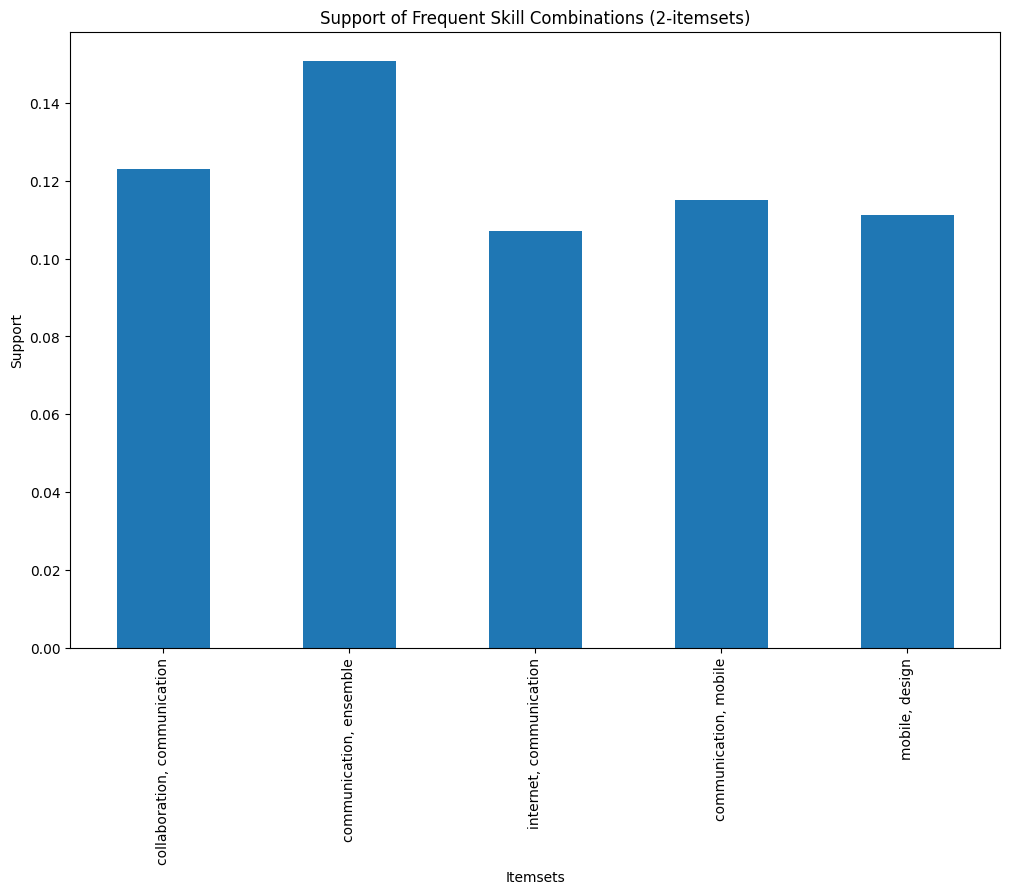

In [17]:
# Visualizing the Frequent Itemsets
# Extracting the number of items in each itemset
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Filter to itemsets with a certain length (e.g., 2 items)
frequent_itemsets_2 = frequent_itemsets[frequent_itemsets['length'] == 2]

# Plotting
plt.figure(figsize=(12, 8))
frequent_itemsets_2['support'].plot(kind='bar')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Support of Frequent Skill Combinations (2-itemsets)')
plt.xticks(range(len(frequent_itemsets_2)), [', '.join(list(item)) for item in frequent_itemsets_2['itemsets']], rotation=90)
plt.show()

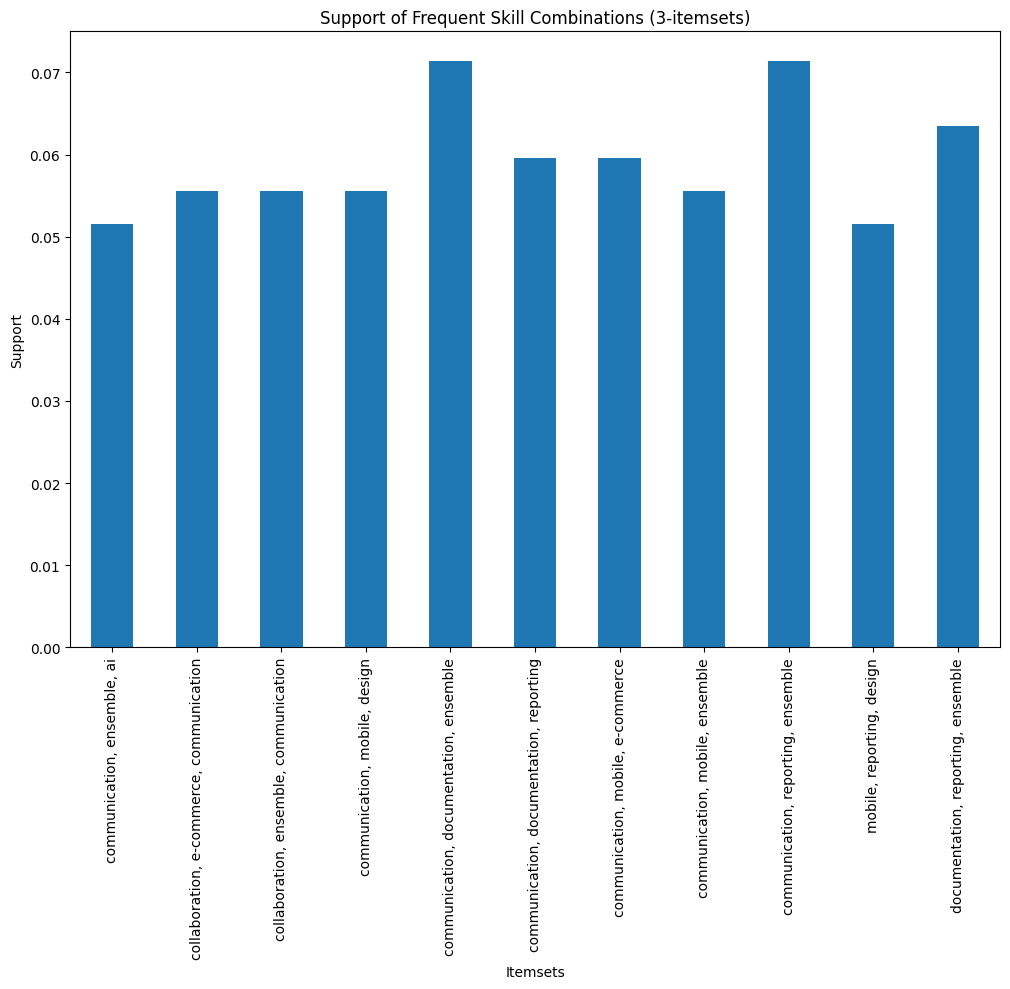

In [18]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(skills_df, min_support=0.05, use_colnames=True)  # Lowered min_support for visualization

# Extracting the number of items in each itemset
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Filter to itemsets with a certain length (e.g., 3 items)
frequent_itemsets_3 = frequent_itemsets[frequent_itemsets['length'] == 3]

# Plotting
plt.figure(figsize=(12, 8))
frequent_itemsets_3['support'].plot(kind='bar')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Support of Frequent Skill Combinations (3-itemsets)')
plt.xticks(range(len(frequent_itemsets_3)), [', '.join(list(item)) for item in frequent_itemsets_3['itemsets']], rotation=90)
plt.show()

In [19]:
# Group the dataset by 'job_title' and aggregate the skills into lists
grouped = df_combined1.groupby('job_title')['skills'].apply(list)

# Flatten the lists of skills for each job title
transactions = [set(skill for sublist in lists for skill in sublist) for lists in grouped]

# Use TransactionEncoder to transform the data into a transactional format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactional_data = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the transactional data
transactional_data.head()

,ai,ajax,analytical,analytics,android,angular,angular2,artificial neural network,asp.net,assembleur,...,visio,volleyball,web analytics,web development,web services,website development,wimax,windows,word,wordpress
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Each transaction is the set of skills, with the job title added as a skill
df_combined1['transaction'] = df_combined1.apply(lambda x: list(x['skills'].keys()) + [x['job_title']], axis=1)

# Create transactional data
te = TransactionEncoder()
te_ary = te.fit(df_combined1['transaction']).transform(df_combined1['transaction'])
transactional_data = pd.DataFrame(te_ary, columns=te.columns_)

transactional_data

,Account Executive,Account Manager,Airline Pilot,Alarm Technician,Assistant Coach,Assistant Customer Care Center Manager,Assistant General Manager,Assistant Principal,Assistant Technician,Associate Athletic Director,...,visio,volleyball,web analytics,web development,web services,website development,wimax,windows,word,wordpress
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
frequent_itemsets = apriori(transactional_data, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.158730,(ai)
1,0.087302,(coaching)
2,0.222222,(collaboration)
3,0.396825,(communication)
4,0.234127,(design)
...,...,...
71,0.055556,"(mobile, communication, ensemble)"
72,0.071429,"(reporting, communication, ensemble)"
73,0.051587,"(design, mobile, reporting)"
74,0.063492,"(documentation, reporting, ensemble)"


In [24]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.001)
rules.tail(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
155,"(communication, ensemble)","(documentation, reporting)",0.150794,0.071429,0.055556,0.368421,5.157895,0.044785,1.470238,0.949266
156,(documentation),"(reporting, communication, ensemble)",0.134921,0.071429,0.055556,0.411765,5.764706,0.045918,1.578571,0.955439
157,(reporting),"(documentation, communication, ensemble)",0.206349,0.071429,0.055556,0.269231,3.769231,0.040816,1.270677,0.925714
158,(communication),"(documentation, reporting, ensemble)",0.396825,0.063492,0.055556,0.140000,2.205000,0.030360,1.088963,0.906015
159,(ensemble),"(documentation, reporting, communication)",0.226190,0.059524,0.055556,0.245614,4.126316,0.042092,1.246678,0.979121


In [25]:
rules.to_csv('rules.csv', header=True)

In [15]:
!pip3 install networkx


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [20]:
top_rules = rules.nlargest(20, 'confidence')  # You can change the sorting criterion to 'lift'


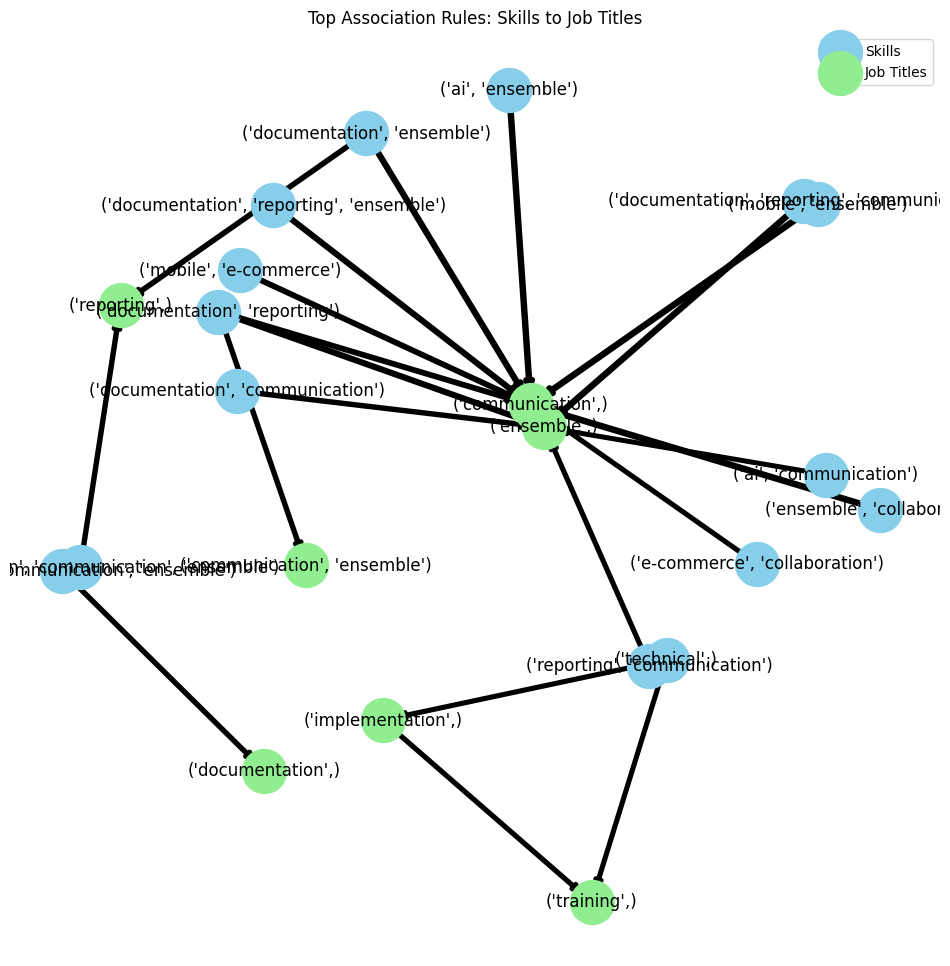

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming top_rules is already defined

# Create a network graph
G = nx.DiGraph()

# Add nodes and edges from the rules
for _, rule in top_rules.iterrows():
    antecedents = tuple(rule['antecedents'])
    consequents = tuple(rule['consequents'])
    G.add_node(antecedents, type='antecedent', label=', '.join(antecedents))
    G.add_node(consequents, type='consequent', label=', '.join(consequents))
    G.add_edge(antecedents, consequents, weight=rule['confidence'])

# Position nodes using the Kamada-Kawai layout for better visualization
pos = nx.kamada_kawai_layout(G)

# Draw antecedent and consequent nodes separately
ant_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'antecedent']
con_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'consequent']
nx.draw_networkx_nodes(G, pos, nodelist=ant_nodes, node_color='skyblue', node_size=1000, label='Skills')
nx.draw_networkx_nodes(G, pos, nodelist=con_nodes, node_color='lightgreen', node_size=1000, label='Job Titles')

# Draw edges with width proportional to the confidence
for (u, v, d) in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight']*5)

# Labels
nx.draw_networkx_labels(G, pos)

# Legend
plt.legend()

# Show the graph
plt.title("Top Association Rules: Skills to Job Titles")
plt.axis('off')
plt.gcf().set_size_inches(12, 12)  # Increase figure size
plt.show()


In [45]:
df = df_combined1

In [59]:
# Create a dummy transaction ID
df['transaction_id'] = df.index

df['job_title'] = df['job_title'].apply(lambda x: 'JobTitle_' + x)

# Create separate records for job titles and skills
job_title_transactions = df[['transaction_id', 'job_title']].rename(columns={'job_title': 'item'})
skill_transactions = df[['transaction_id', 'skills']].explode('skills').rename(columns={'skills': 'item'})

# Combine into one DataFrame
all_transactions = pd.concat([job_title_transactions, skill_transactions])

# Pivot the data to create a transactional format
transactional_data = pd.crosstab(index=all_transactions['transaction_id'], columns=all_transactions['item'])

In [61]:
transactional_data

item,JobTitle_Account Executive,JobTitle_Account Manager,JobTitle_Airline Pilot,JobTitle_Alarm Technician,JobTitle_Assistant Coach,JobTitle_Assistant Customer Care Center Manager,JobTitle_Assistant General Manager,JobTitle_Assistant Principal,JobTitle_Assistant Technician,JobTitle_Associate Athletic Director,...,visio,volleyball,web analytics,web development,web services,website development,wimax,windows,word,wordpress
transaction_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm
frequent_itemsets = apriori(transactional_data, min_support=0.05, use_colnames=True)
frequent_itemsets

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.158730,(ai)
1,0.087302,(coaching)
2,0.222222,(collaboration)
3,0.396825,(communication)
4,0.234127,(design)
...,...,...
71,0.055556,"(mobile, communication, ensemble)"
72,0.071429,"(reporting, communication, ensemble)"
73,0.051587,"(design, mobile, reporting)"
74,0.063492,"(documentation, reporting, ensemble)"


In [68]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm
frequent_itemsets = apriori(transactional_data, min_support=0.03, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ai),(coaching),0.158730,0.087302,0.035714,0.225000,2.577273,0.021857,1.177675,0.727463
1,(coaching),(ai),0.087302,0.158730,0.035714,0.409091,2.577273,0.021857,1.423687,0.670531
2,(ai),(communication),0.158730,0.396825,0.071429,0.450000,1.134000,0.008440,1.096681,0.140461
3,(communication),(ai),0.396825,0.158730,0.071429,0.180000,1.134000,0.008440,1.025939,0.195906
4,(documentation),(ai),0.134921,0.158730,0.035714,0.264706,1.667647,0.014298,1.144127,0.462793
...,...,...,...,...,...,...,...,...,...,...
2818,(ensemble),"(documentation, mobile, innovation, communicat...",0.226190,0.031746,0.031746,0.140351,4.421053,0.024565,1.126336,1.000000
2819,(mobile),"(documentation, ensemble, innovation, communic...",0.226190,0.031746,0.031746,0.140351,4.421053,0.024565,1.126336,1.000000
2820,(innovation),"(documentation, ensemble, mobile, communicatio...",0.103175,0.031746,0.031746,0.307692,9.692308,0.028471,1.398589,1.000000
2821,(collaboration),"(documentation, ensemble, mobile, innovation, ...",0.222222,0.031746,0.031746,0.142857,4.500000,0.024691,1.129630,1.000000


In [69]:
# Assuming you have a list of all unique job titles
unique_job_titles = set(df['job_title'].unique())
# Alternatively, if job titles follow a specific format, you might use a function to identify them
# Example: job titles might start with 'JobTitle_'
is_job_title = lambda item: item.startswith('JobTitle_')


In [70]:
# Filter rules where antecedents are skills and consequents are job titles
skill_to_job_rules = rules[rules['antecedents'].apply(lambda x: not any(item in unique_job_titles for item in x)) &
                           rules['consequents'].apply(lambda x: any(item in unique_job_titles for item in x))]

# Filter rules where antecedents are job titles and consequents are skills
job_to_skill_rules = rules[rules['antecedents'].apply(lambda x: any(item in unique_job_titles for item in x)) &
                           rules['consequents'].apply(lambda x: not any(item in unique_job_titles for item in x))]

# Display the filtered rules
print("Rules where skills lead to job titles:")
print(skill_to_job_rules)

print("\nRules where job titles lead to skills:")
print(job_to_skill_rules)


Rules where skills lead to job titles:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

Rules where job titles lead to skills:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


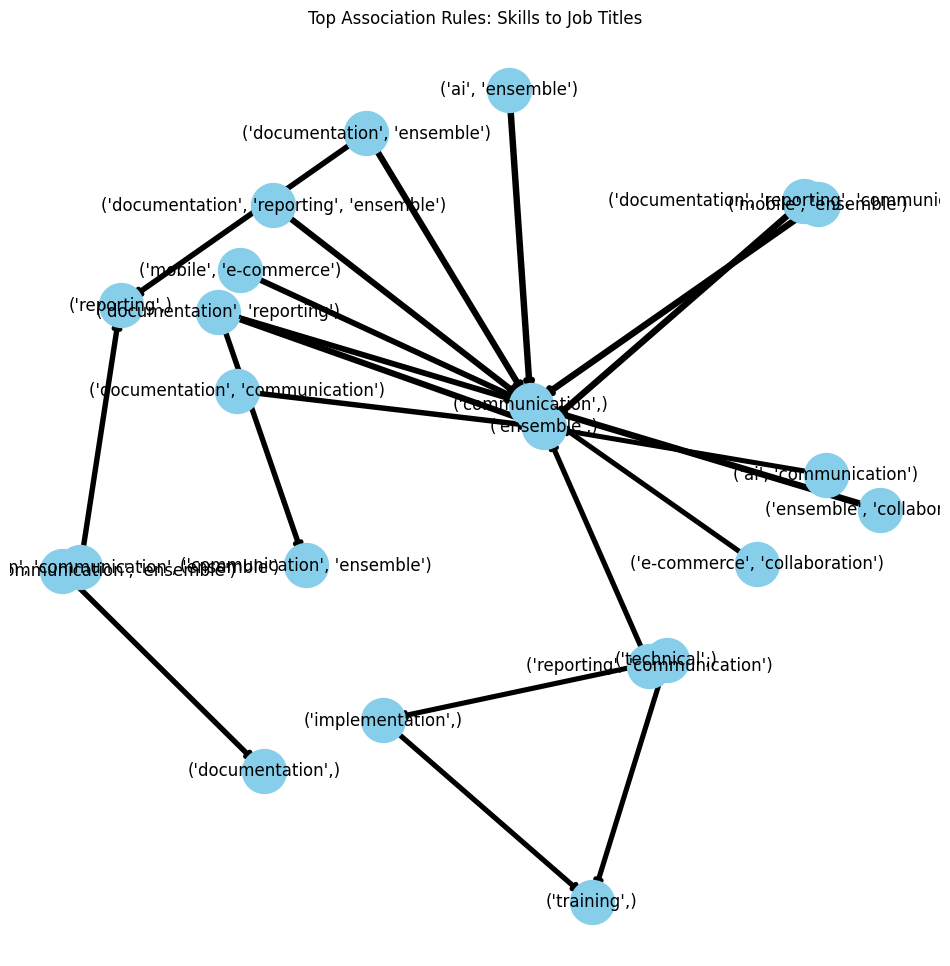

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming top_rules is already defined and contains the association rules

# Create a network graph
G = nx.DiGraph()

# Add nodes and edges from the rules
for _, rule in top_rules.iterrows():
    antecedents = tuple(rule['antecedents'])
    consequents = tuple(rule['consequents'])
    G.add_node(antecedents, type='antecedent', label=', '.join(antecedents))
    G.add_node(consequents, type='consequent', label=', '.join(consequents))
    G.add_edge(antecedents, consequents, weight=rule['confidence'])

# Position nodes using the Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Draw nodes
for node, data in G.nodes(data=True):
    if 'JobTitle_' in data['label']:
        # Job title nodes in green
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='green', node_size=1000, label='Job Titles')
    else:
        # Skill nodes in another color (e.g., skyblue)
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='skyblue', node_size=1000, label='Skills')

# Draw edges with width proportional to the confidence
for (u, v, d) in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight'] * 5)

# Labels
nx.draw_networkx_labels(G, pos)

# Show the graph
plt.title("Top Association Rules: Skills to Job Titles")
plt.axis('off')
plt.gcf().set_size_inches(12, 12)  # Increase figure size for better visibility
plt.show()


# 3. Data Analysis

In [138]:
df_combined2

,posted_by_id,status,city,job_title,organization_id,contracts,description,skills,company_name,email,address,size,sectors
0,1,published,Bondues,Stagiaire (H/F) Assistant Marketing Nutritionnel,1,Stage6mois,Entreprise Le Groupe LACTALIS (près de ...,{'skills': {'communication': 1}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
1,1,published,Laval,Stagiaire (H/F) Ingénieur Maintenance Toute Fr...,1,Stage6mois,Entreprise Vous souhaitez faire vos pre...,{'skills': {}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
2,1,published,Châteaubourg,Stage (H/F) Ingé Production (35),1,Stage6mois,Entreprise Vous souhaitez faire vos pre...,{'skills': {'autonome': 1}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
3,1,published,Châteaubourg,Stage (H/F) Ingé Prod - fabrication (35),1,Stage6mois,Entreprise Vous souhaitez faire vos pre...,{'skills': {'autonome': 1}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
4,1,published,Noisy-le-Grand,Stagiaire H/F- Chargé(e) de missions RH,1,Stage6mois,Entreprise La Division Lactalis Nestlé ...,{'skills': {}},HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,200,published,HautsdeSeine,Sourcing Leader H/F,200,CDI,Entreprise Acteur majeur du secteur agr...,"{'skills': {'communication': 3, 'innovation': 4}}",EVERMAN HIGH SCHOOL,Andrew.D.Matthews@pookmail.com,10795 FM 1886,MC,GD
5083,200,published,HautsdeSeine,Senior Brand Manager Adult Indulgence H/F,200,CDI,Entreprise Acteur majeur du secteur agr...,"{'skills': {'communication': 3, 'collaboration...",EVERMAN HIGH SCHOOL,Andrew.D.Matthews@pookmail.com,10795 FM 1886,MC,GD
5084,200,published,HautsdeSeine,Compte-clé national marques de distributeurs h/f,200,CDI,Entreprise Acteur majeur du secteur agr...,{'skills': {'innovation': 1}},EVERMAN HIGH SCHOOL,Andrew.D.Matthews@pookmail.com,10795 FM 1886,MC,GD
5085,200,published,HautsdeSeine,Brand Demand Planner - Géant Vert-CDD 7 mois H/F,200,CDD7mois,Entreprise Acteur majeur du secteur agr...,"{'skills': {'reporting': 2, 'sap': 3, 'innovat...",EVERMAN HIGH SCHOOL,Andrew.D.Matthews@pookmail.com,10795 FM 1886,MC,GD


In [137]:
df_combined1

,user_id,status,city,job_title,organization_id,contracts,description,skills,company_name,email,address,size,sectors
0,55,published,HOMERVILLE,Medical Receptionist,0,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'training': 1, 'certifications': 1...",BARON & DECK,John.C.Maher@spambob.com,1018 1ST AVE APT 1229 # 7A,MC,PT
1,90,published,DEMOTTE,Clinical Research Associate,1,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'hardware': 2, 'communication': 1,...",HILLSIDE TERRACE APTS,Shelley.M.Hamer@mailinator.com,10051 SANDRIDGE RD,BG,VA
2,2,published,CARY,Territory Sales Representative,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'communication': 4, 'e-commerce': 1}}",GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD
3,22,published,CHICAGO RIDGE,Endoscopy Nurse,2,AL,'Lorem ipsum dolor sit amet consectetur adipis...,{'skills': {'e-commerce': 1}},GEORGE B LEWIS APTS,Tracie.M.Vargas@dodgit.com,10964 54TH ST SE,MC,GD
4,3,published,SKOWHEGAN,Bus Driver,3,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'mobile': 1, 'communication': 2, '...",F A A AIRPORT,John.P.Stephens@pookmail.com,10826 WALNUT ST,MD,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,196,published,WESTPORT,Controls Engineer,196,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'ai': 2, 'hardware': 1, 'internet'...",EASTERN REHABILATION,Dorothy.R.Delacruz@mailinator.com,100 E PARK CIR,ST,PT
248,197,published,LOCKESBURG,Implementation Consultant,197,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'reporting': 2, 'ai': 5, 'communic...",EVERMAN HIGH SCHOOL,Aaron.E.Avila@spambob.com,100 ADRIANS PL,MC,MA
249,198,published,LILLY,Competitive Intelligence Manager,198,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'certifications': 1, 'ai': 6, 'boo...",BRITTANY APTS,Louis.L.Wiese@spambob.com,1 MOREY PARK HILL RD,MD,GD
250,199,published,KIRKLAND,Health/Physical Education Teacher,199,AL,'Lorem ipsum dolor sit amet consectetur adipis...,"{'skills': {'mobile': 1, 'design': 1}}",BOARD OF EDUCATION,Johnnie.S.Guerrero@spambob.com,1 EASTMAN KODAK,MC,DM


In [129]:
job_count_data = pd.DataFrame(df_combined1['job_title'].value_counts())
job_count_data['job'] = job_count_data.index
job_count_data.rename(columns={'job_title': 'count'}, inplace=True)
job_count_data.index = range(len(np.array(job_count_data['job'])))
job_count_data

,count,job
0,3,Bus Driver
1,2,Medical Receptionist
2,2,Competitive Intelligence Manager
3,2,Business Intelligence Developer
4,2,Online Customer Support
...,...,...
217,1,Human Resources Director
218,1,Crew Scheduling Manager
219,1,Controller
220,1,Senior Manager Yield and Revenue Management


In [130]:
jobs_stats = pd.DataFrame(job_count_data['count'].value_counts())
jobs_stats

,count
count,
1,193
2,28
3,1


In [131]:
import matplotlib.pyplot as plt

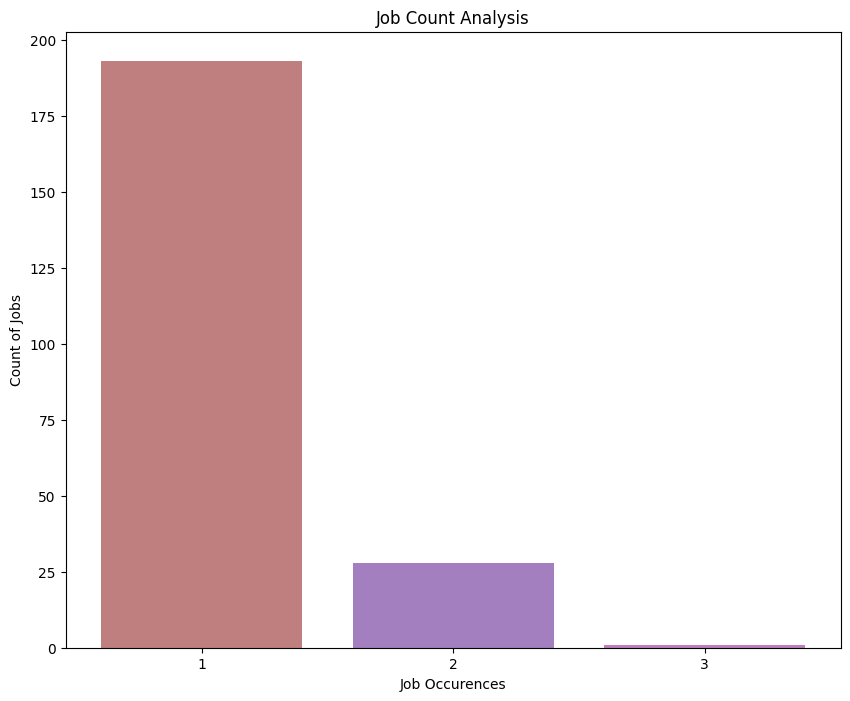

In [139]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
names = ['1','2','3']
plt.bar(np.arange(len(np.array(jobs_stats['count']))), jobs_stats['count'], color = ['maroon', 'indigo', 'purple'],align='center', alpha=0.5)
plt.xticks(np.arange(len(np.array(jobs_stats['count']))), names)
#plt.xticks(rotation = 90)
plt.xlabel('Job Occurences')
plt.ylabel('Count of Jobs')
plt.title('Job Count Analysis')

plt.show()

In [140]:
skills_list=[]
for val in skills:
    for keys in val:
        skills_list.append(keys)

print(len(skills_list))
print(skills_list)

1207
['testing', 'http', 'programming', 'training', 'certifications', 'support', 'prototyping', 'documentation', 'tech', 'data', 'penetration', 'technical', 'implementation', 'processing', 'networks', 'communication', 'ensemble', 'hardware', 'communication', 'ecommerce', 'ecommerce', 'design', 'diagnostics', 'communication', 'ai', 'mobile', 'collaboration', 'coding', 'telecom', 'technical', 'communication', 'development', 'implementation', 'coaching', 'hardware', 'design', 'internet', 'html', 'php', 'troubleshooting', 'designer', 'electronics', 'processing', 'programming', 'web', 'training', 'networks', 'backend', 'design', 'internet', 'html', 'http', 'git', 'ecommerce', 'nodejs', 'svg', 'angular', 'communication', 'mobile', 'collection', 'collaboration', 'data', 'technical', 'communication', 'machine', 'mobile', 'ecommerce', 'mining', 'implementation', 'design', 'mathematics', 'deep', 'processing', 'innovation', 'go', 'learning', 'training', 'engineering', 'communication', 'reporting'

In [166]:
skills_data = pd.DataFrame()
skills_data['skills'] = skills_list
skills_count_data = pd.DataFrame(skills_data['skills'].value_counts())
skills_count_data.rename(columns={'skills' : 'count'}, inplace= True)
skills_count_data['skills'] = skills_count_data.index
skills_count_data.index = range(len(skills_count_data['skills']))
skills_count_data

,count,skills
0,97,communication
1,65,internet
2,58,design
3,55,ensemble
4,55,collaboration
...,...,...
150,1,swing
151,1,artificial
152,1,neural
153,1,shiny


In [142]:
countvals = pd.DataFrame(skills_count_data['count'].value_counts())
countvals.rename(columns={'count':'number of skills'}, inplace = True)
countvals['frequency'] = countvals.index
countvals.index = range(len(countvals['frequency']))
countvals

,number of skills,frequency
0,48,1
1,35,2
2,21,3
3,7,6
4,5,4
5,5,5
6,4,33
7,4,14
8,3,10
9,2,13


In [143]:
countss = skills_count_data['count'].unique()
len(countss)
#countss

28

In [144]:
# taggies = []
# for cc in countss:
#   id,tags = skills_count_data.loc[skills_count_data['count']==cc]['skills']
#   taggies.append(tags)
# taggies

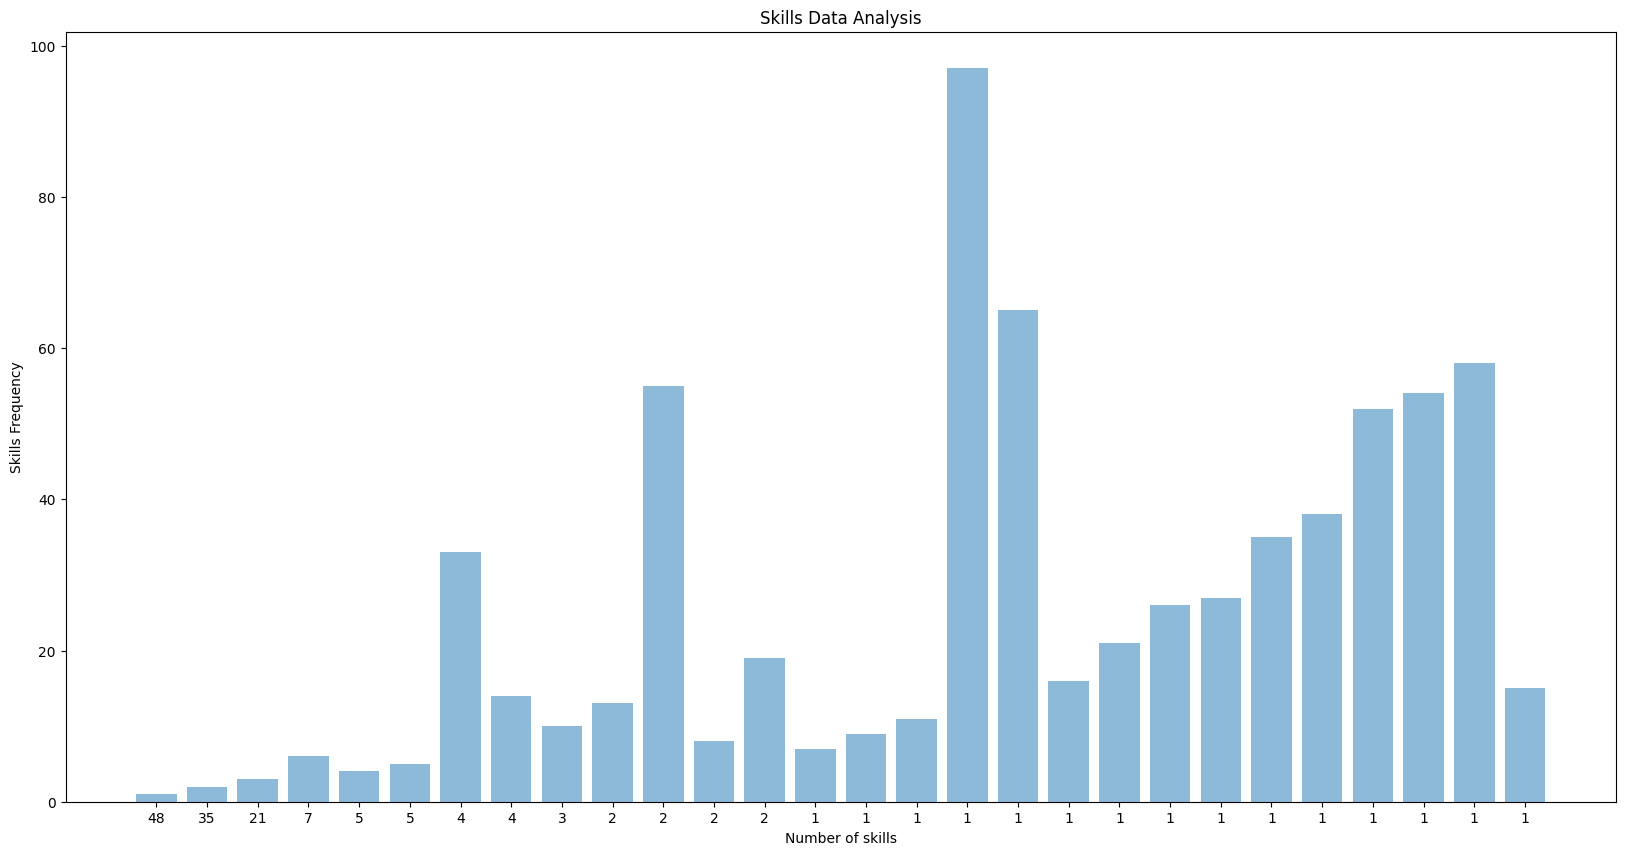

In [145]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)
#names = ['1','2','3']
plt.bar(np.arange(len(np.array(countvals['frequency']))), countvals['frequency'],align='center', alpha=0.5)
plt.xticks(np.arange(len(np.array(countvals['number of skills']))), countvals['number of skills'])
#plt.xticks(rotation = 90)
plt.xlabel('Number of skills')
plt.ylabel('Skills Frequency')
plt.title('Skills Data Analysis')

plt.show()

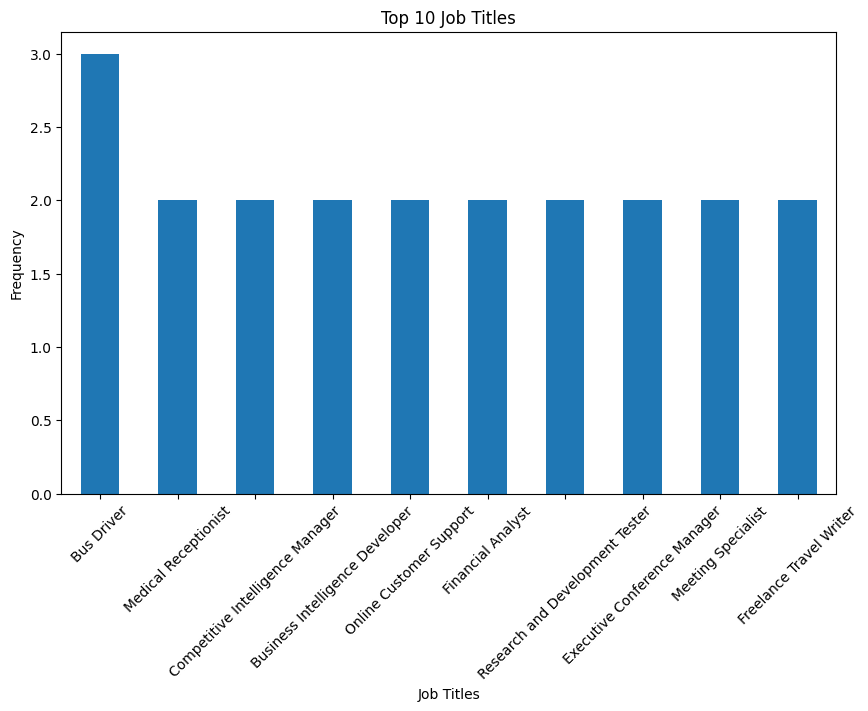

In [146]:
import matplotlib.pyplot as plt

job_title_counts = df_combined1['job_title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
job_title_counts.plot(kind='bar')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [171]:
df_combined1['job_title']

0                   Medical Receptionist
1            Clinical Research Associate
2         Territory Sales Representative
3                        Endoscopy Nurse
4                             Bus Driver
                     ...                
247                    Controls Engineer
248            Implementation Consultant
249     Competitive Intelligence Manager
250    Health/Physical Education Teacher
251                  Mechanical Engineer
Name: job_title, Length: 252, dtype: object

In [172]:
df_combined1['skills']

0      {'skills': {'training': 1, 'certifications': 1...
1      {'skills': {'hardware': 2, 'communication': 1,...
2      {'skills': {'communication': 4, 'e-commerce': 1}}
3                          {'skills': {'e-commerce': 1}}
4      {'skills': {'mobile': 1, 'communication': 2, '...
                             ...                        
247    {'skills': {'ai': 2, 'hardware': 1, 'internet'...
248    {'skills': {'reporting': 2, 'ai': 5, 'communic...
249    {'skills': {'certifications': 1, 'ai': 6, 'boo...
250               {'skills': {'mobile': 1, 'design': 1}}
251    {'skills': {'reporting': 2, 'ai': 5, 'communic...
Name: skills, Length: 252, dtype: object

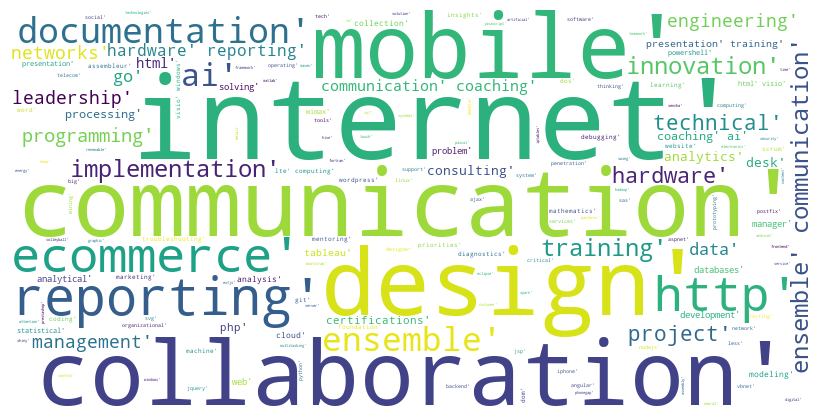

In [175]:
from wordcloud import WordCloud
import json

# Combine all skills into a single string
# all_skills = ' '.join([json.loads(s)['skills'] for s in df_combined1['skills']])

# Create a WordCloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(str(skills_list))

# Display the WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [6]:
import json
import pandas as pd
import ast

# Convert the 'skills' column from a string representation of a dictionary to an actual dictionary
df_combined1['skills'] = df_combined1['skills'].apply(lambda x: ast.literal_eval(x)['skills'])

# Initialize an empty DataFrame to store the transformed skills data
skills_df = pd.DataFrame()

# Loop over the DataFrame and populate the skills_df
for index, row in df_combined1.iterrows():
    for skill, value in row['skills'].items():
        skills_df.at[index, skill] = value

# Fill NaN values with 0 (assuming no skill means 0 frequency)
skills_df.fillna(0, inplace=True)

# Add the job_title column to the skills DataFrame
skills_df['job_title'] = df_combined1['job_title']

# Display the first few rows of the skills_df
skills_df.head()


,training,certifications,http,processing,implementation,hardware,communication,ensemble,e-commerce,mobile,...,network security,prestashop,social media marketing,attention to detail,digital marketing,content marketing,web analytics,eclipse,bootstrap,job_title
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Medical Receptionist
1,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Clinical Research Associate
2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Territory Sales Representative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Endoscopy Nurse
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus Driver


In [181]:
# Group by 'job_title' and sum the skill frequencies
grouped_skills_df = skills_df.groupby('job_title').sum()

# Display the first few rows of the grouped DataFrame
grouped_skills_df.head()


,training,certifications,http,processing,implementation,hardware,communication,ensemble,e-commerce,mobile,...,pascal,network security,prestashop,social media marketing,attention to detail,digital marketing,content marketing,web analytics,eclipse,bootstrap
job_title,,,,,,,,,,,,,,,,,,,,,
Account Executive,1.0,1.0,1.0,1.0,1.0,0.0,9.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Account Manager,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Airline Pilot,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alarm Technician,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Assistant Coach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


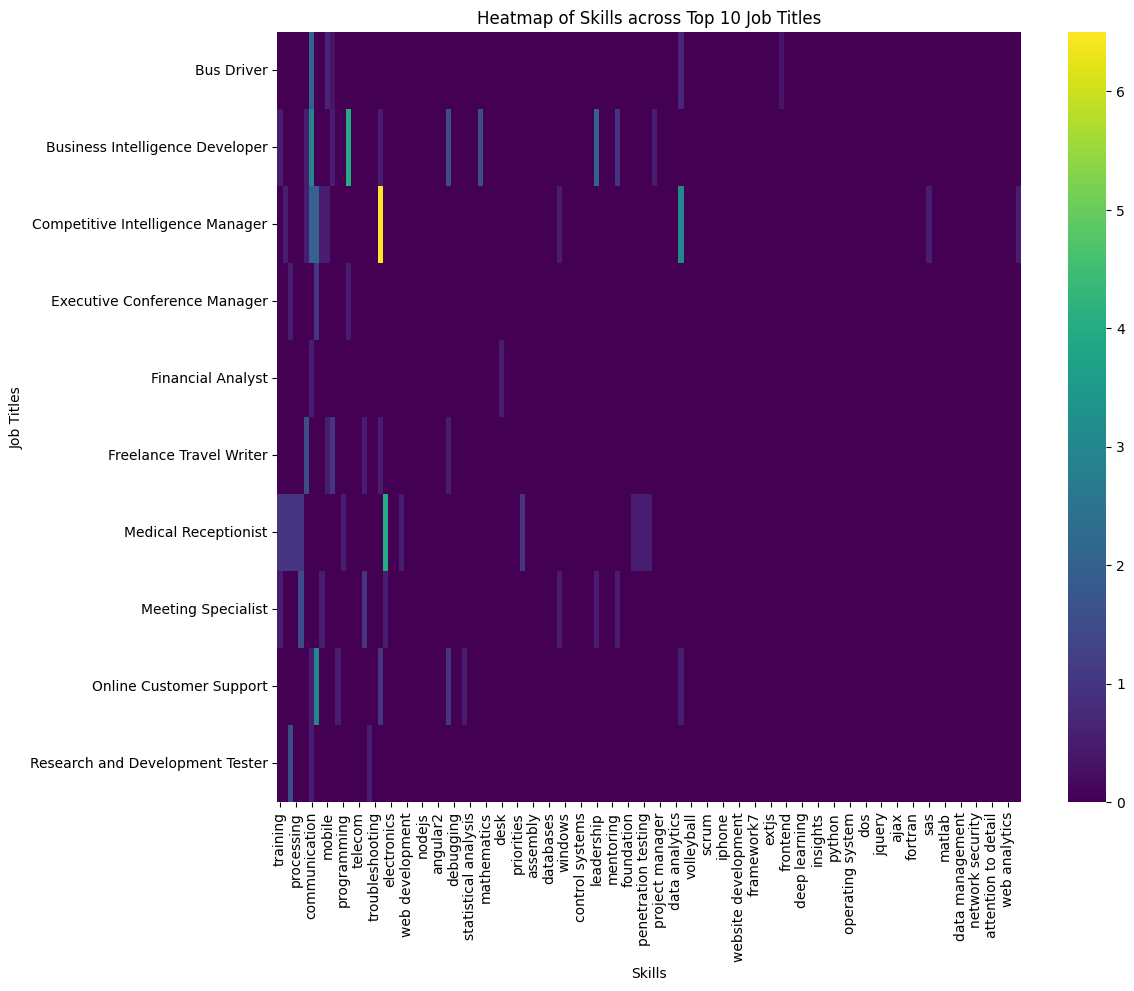

In [207]:
import pandas as pd
import json

# Convert the 'skills' column from a string representation of a dictionary to an actual dictionary

# Initialize an empty DataFrame for skills
skills_df = pd.DataFrame(index=df_combined1.index)

# Extract each skill as a separate column
for index, row in df_combined1.iterrows():
    for skill, value in row['skills'].items():
        skills_df.at[index, skill] = value

# Fill NaN values with 0 (assuming no skill means 0 frequency)
skills_df.fillna(0, inplace=True)

# Add the job_title column to the skills DataFrame
skills_df['job_title'] = df_combined1['job_title']


# Find the top 10 most frequent job titles
top_10_job_titles = df_combined1['job_title'].value_counts().head(10).index

# Filter the DataFrame for top 10 job titles
top_10_skills_df = skills_df[skills_df['job_title'].isin(top_10_job_titles)]

# Group by job title and calculate the average for each skill
grouped_skills_df = top_10_skills_df.groupby('job_title').mean()

import seaborn as sns
import matplotlib.pyplot as plt

# Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(grouped_skills_df, annot=False, cmap='viridis')
plt.title('Heatmap of Skills across Top 10 Job Titles')
plt.xlabel('Skills')
plt.ylabel('Job Titles')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


In [255]:
# Define a list of specific job titles you want to include
selected_job_titles = ['Market Access Associate', 'Project Manager', 'Software Developer', 'Assistant Technician']  # Replace with actual job titles

# Define a list of specific skills you want to analyze
selected_skills = ['communication', 'internet', 'data analytics', 'programming', 'design', 'ensemble']  # Replace with actual skill names


In [256]:
import pandas as pd
import json

# Convert the 'skills' column from a string representation of a dictionary to an actual dictionary

# Filter the DataFrame for the selected job titles
selected_df = df_combined1[df_combined1['job_title'].isin(selected_job_titles)]

# Define a function to safely extract skill values and compute the mean
def extract_skill_mean(group, skill):
    return group.apply(lambda skill_dict: skill_dict.get(skill, 0)).mean()

# Initialize an empty DataFrame for the selected skills
skills_data = pd.DataFrame()

# Group by job title
grouped = selected_df.groupby('job_title')['skills']

# Extract the average of selected skills for each job title
for skill in selected_skills:
    skills_data[skill] = grouped.apply(lambda x: extract_skill_mean(x, skill))

# Reset index to make job titles a column
skills_data.reset_index(inplace=True)


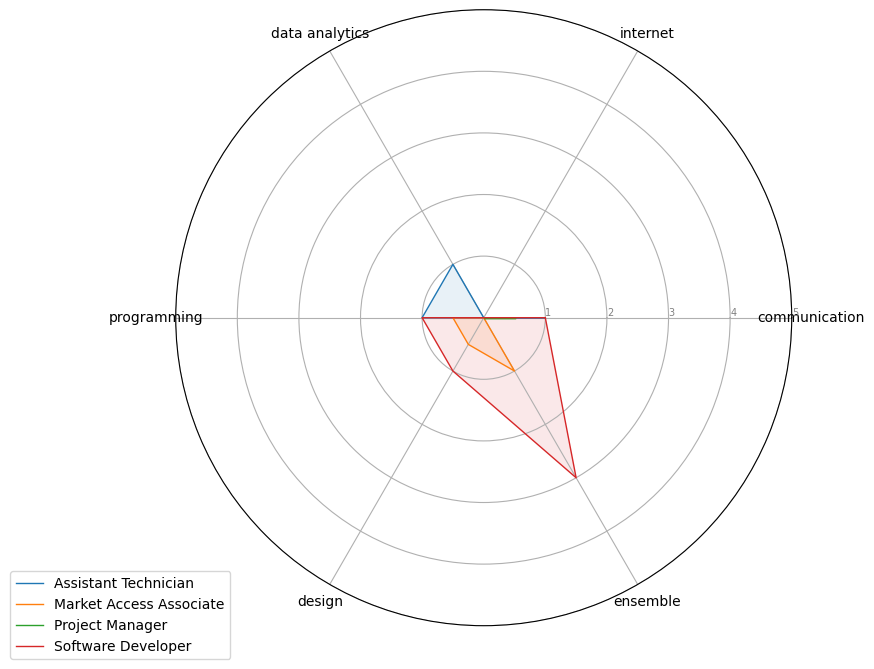

In [257]:
from math import pi
import matplotlib.pyplot as plt

# Number of variables (skills)
num_vars = len(selected_skills)

# Compute angle each bar is centered on
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Ensure the graph is circular

# Plot each job title's skill profile
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], selected_skills)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
plt.ylim(0, 5)

# Plot data and fill with color for each job title
for idx, row in skills_data.iterrows():
    values = row.drop('job_title').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=row['job_title'])
    ax.fill(angles, values, alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()
